<a href="https://colab.research.google.com/github/xinnazim/esaa/blob/main/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9Cch3_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


파이썬 딥러닝 텐서플로 ch3.1~3

pg. 50 ~ 86 필사하여 깃허브에 업로드한 뒤, 깃허브 링크를 댓글로 달아주세요.

# PART 3. 케라스

## 01. 딥러닝 준비
### 1-1 주요 용어
1-1-1 하이퍼파라미터
* 모델 훈련 시 사용자가 설정해주는 값
* 하이퍼파라미터 조절로 많은 시간 투자해서 예측 성능 높임 -> 튜닝

1-1-2 과소적합 vs 과대적합

* 과소적합: 모델이 충분이 학습되지 않아 예측 성능 떨어진 상태
* 과대적합: 지나치게 반복 학습해 과하게 적합된 상태

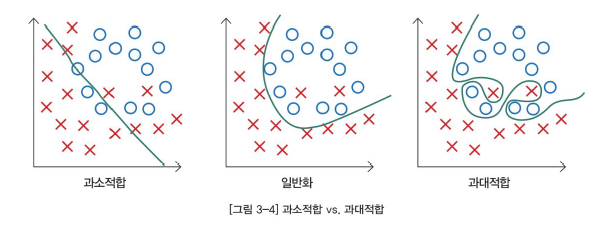

1-1-3 에포크
* 딥러닝 모델이 반복 훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프= 1 에포크

1-1-4 손실함수(loss ftn)
* 예측 값과 정답 값의 차이 또는 차
* 지도학습의 분류 문제
  * 이진 분류: binary_crossentropy, 출력층 활성 함수=sigmoid
  * 다중 분류: categorical_crossentropy, 원핫 벡터, 숫자로 구분 시 = sparse_categorical_crossentropy, 출력층 활성함수=softmax

* 텐서플로에서는 함수형과 클래스형으로 제공
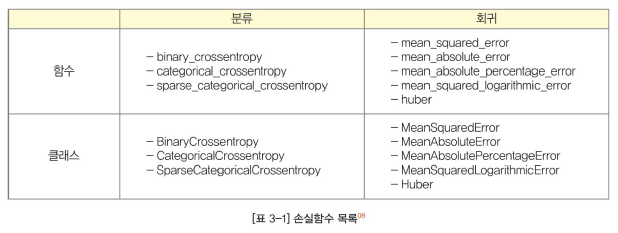


In [1]:
import tensorflow as tf

# 클래스
tf.keras.losses.BinaryCrossentropy()

# 함수
tf.keras.losses.binary_crossentropy

<function keras.src.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

> 딥러닝 문제에 따라 직접 손실함수 만들어야하는 경우도 있음

1-1-5 경사하강법
* 모델 내부의 가중치에 대한 미분 값 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 최소 함수 값을 갖도록 하는 방법
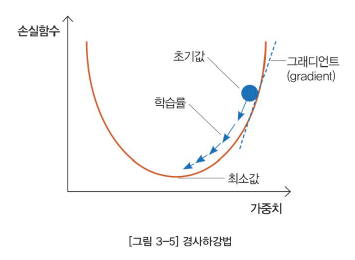

* 넘파이로 구현한 예제
  * Loss ftn
  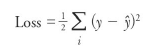
* 단순 선형회귀 수식: y = wx + b

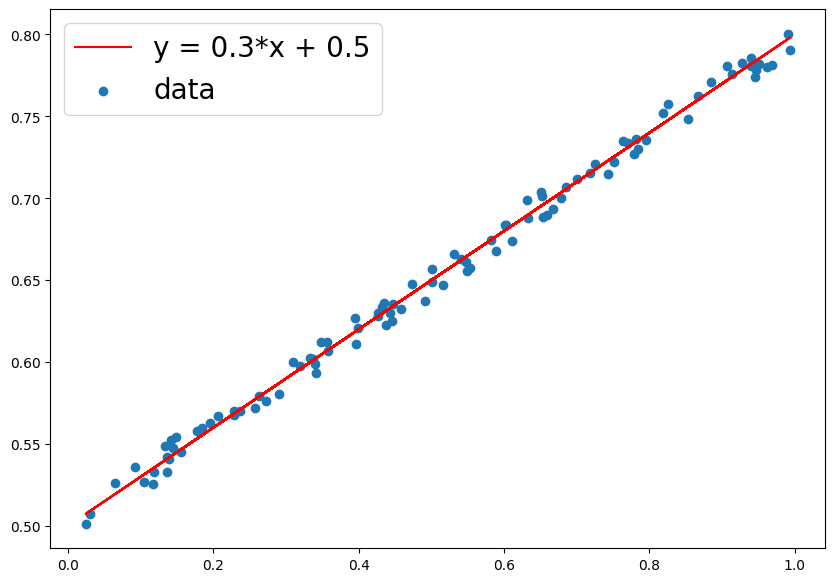

w:0.3,b:0.5


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터셋 만들기
def make_linear(w=0.5,b=0.8, size=50, noise=1.0):
  x = np.random.rand(size)
  y = w * x + b
  noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
  yy = y + noise
  plt.figure(figsize=(10,7))
  plt.plot(x,y,color='r',label=f'y = {w}*x + {b}')
  plt.scatter(x,yy,label='data')
  plt.legend(fontsize=20)
  plt.show()
  print(f'w:{w},b:{b}')
  return x,yy

x,y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

> 그래디언트 w,b 업데이트 수식 구하고 넘파이로 최적화

In [3]:
# 최대 반복 횟수
num_epoch = 1000

# 학습률(learning_rate)
learning_rate = 0.005

# 에러 기록
errors = []

# random 한 값으로 w,b를 초기화
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
  # Hypothesis 정의
  y_hat = w * x + b

  # Loss Function 정의
  error = 0.5*((y_hat-y)**2).sum()
  if error < 0.005:
    break
  # Gradient 미분 계산
  w = w - learning_rate * ((y_hat-y)*x).sum()
  b = b - learning_rate * (y_hat-y).sum()

  errors.append(error)

  if epoch % 5 == 0:
    print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch,w,b,error))

print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch,w,b,error))

 0 w = 0.69141, b = 0.38911 error = 4.60050
 5 w = 0.59897, b = 0.33670 error = 0.37464
10 w = 0.55648, b = 0.35931 error = 0.27736
15 w = 0.52016, b = 0.37916 error = 0.20553
20 w = 0.48894, b = 0.39624 error = 0.15242
25 w = 0.46208, b = 0.41092 error = 0.11314
30 w = 0.43899, b = 0.42354 error = 0.08410
35 w = 0.41913, b = 0.43440 error = 0.06262
40 w = 0.40206, b = 0.44373 error = 0.04674
45 w = 0.38737, b = 0.45176 error = 0.03500
50 w = 0.37475, b = 0.45867 error = 0.02631
55 w = 0.36389, b = 0.46460 error = 0.01989
60 w = 0.35455, b = 0.46971 error = 0.01514
65 w = 0.34652, b = 0.47410 error = 0.01163
70 w = 0.33962, b = 0.47787 error = 0.00903
75 w = 0.33368, b = 0.48112 error = 0.00711
80 w = 0.32857, b = 0.48391 error = 0.00569
------------------------------------------------------------
84 w = 0.3, b = 0.5 error = 0.00483


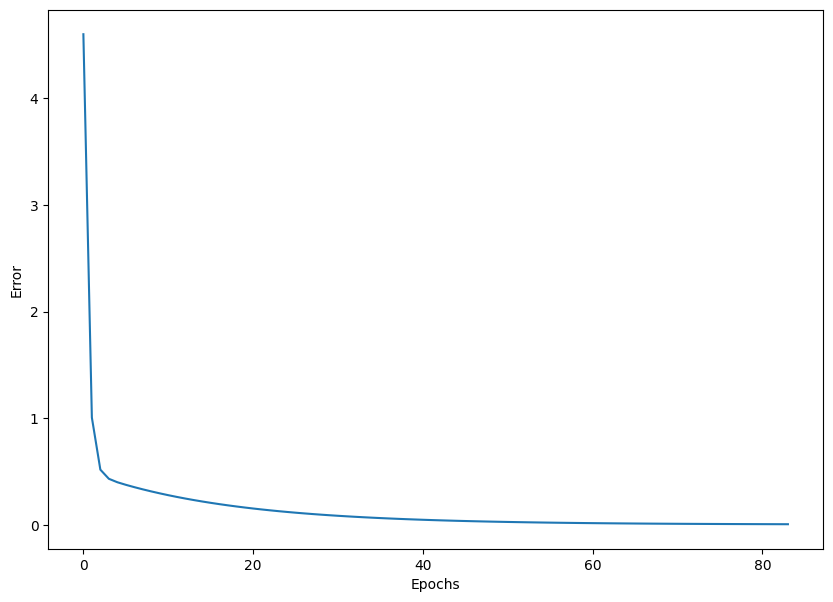

In [4]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

## 1-2 딥러닝 프로세스
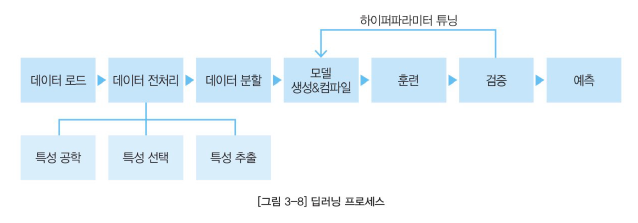

1-2-1 데이터 전처리</br>
1-2-2 모델 생성</br>
1-2-3 모델 컴파일
* 손실함수, 옵티파이저, 평가지표 정의
* 모델 인스턴스에 compile() 메소드 적용

1-2-4 모델 훈련
* fit()

1-2-5 모델 검증</br>

1-2-6 모델 예측

# 02. 단순 신경망 훈련
## 2-1 선형회귀
* 텐서플로 케라스 활용 단순 선형회귀 모델
  * 모델 1차 함수 y = wx + b

## 2-2 뉴런(=node)
* 인공 신경말 모델 구성하는 하나의 신경
* 뉴런->레이어->신경망
* 뉴런 내부 가중치 존재, 모델이 훈련 진행하면서 오차 역전파를 통해 뉴런의 가중치 업데이트

## 2-3 Dense 레이어
* 심층 신경망 모델 구성하는 가장 기본 레이어
* 레이어 사이에 모든 뉴런이 연결되어 있어 **완전 연결층**이라고 부르기도 함
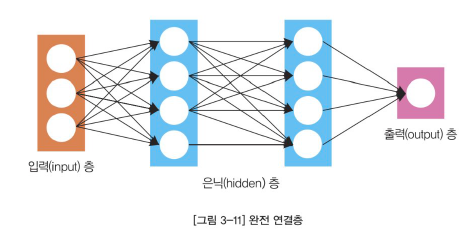

In [5]:
import tensorflow as tf

# 10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

# ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

## 2-4 데이터셋 생성
* 단순선형회귀 모형 지도학습 방식으로 훈련

In [6]:
# 샘플 데이터셋 생성
x = np.arange(1,6)

# y = 3x + 2
y = 3*x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


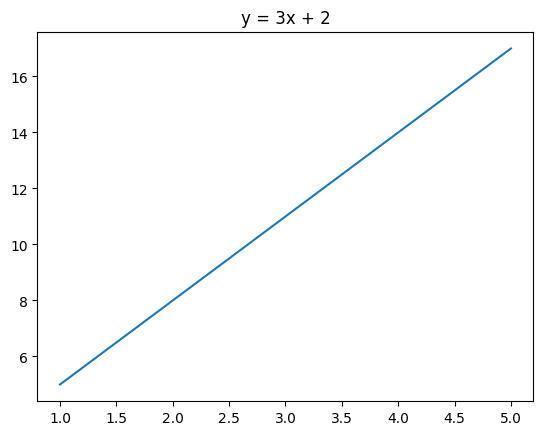

In [7]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x,y)
plt.title('y = 3x + 2')
plt.show()

## 2-5 Sequential API - 케라스
* 매우 간결하게 딥러닝 모델 생성 가능
* 방식: 층을 이어 붙이듯 시퀀스에 맞게 일렬로 연결
* 입력 레이어부터 출력 레이어까지 순서 가짐
* 입력 데이터는 가장 앞에 위치한 층에 투입, 층 통과하면서 딥러닝 연산 수행
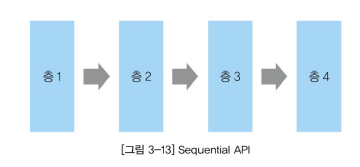

> 직관적이지만 다중 입력, 출력 구조는 만들 수 없음

2-5-1 Seguential API 모델 구조


In [8]:
# 1. 리스트형

import tensorflow as tf
model = tf.keras.Sequential([
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(5),
        tf.keras.layers.Dense(1)
])

In [9]:
# 2. add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

2-5-2 입력 데이터 형태
* 반드시 첫번째 층 input_shape 매개 변수 지정

In [10]:
import tensorflow as tf

model = tf.keras.Sequential([
  # 입력 데이터의 shape=(150,4)인 경우 input_shape 지정
  tf.keras.layers.Dense(10, input_shape=[4]),
  tf.keras.layers.Dense(5),
  tf.keras.layers.Dense(1)
])


2-5-3 모델 정의

In [11]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1])
])

## 2-6 모델 요약

In [12]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> * Total params: 모델 내부 모든 파라미터 합계
* Trainable params: 모델 훈련 시 업데이트 할 파라미터 총 개수
* Non-trainable params: 업데이트 하지 않을 파라미터 총 개수

## 2-7 컴파일

In [13]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error',
              metrics=['mean_squared_error', 'mean_absolute_error'])

In [14]:
# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

In [15]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()
              ])

In [16]:
# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

## 2-8 훈련


In [17]:
model.fit(x,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 497ms/step - loss: 79.1019 - mae: 8.3714
Epoch 2/5
1/1 [==============================] - 0s 13ms/step - loss: 46.2251 - mae: 6.4423
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 27.0653 - mae: 4.9694
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 15.8990 - mae: 3.8449
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 9.3910 - mae: 2.9863


In [18]:
# 단순 선형회귀 모델 생성
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1])
])

# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# 훈련
history = model.fit(x, y, epochs=1200)

Epoch 1/1200
1/1 [==============================] - 1s 534ms/step - loss: 208.1349 - mae: 13.3904
Epoch 2/1200
1/1 [==============================] - 0s 11ms/step - loss: 121.3487 - mae: 10.2567
Epoch 3/1200
1/1 [==============================] - 0s 11ms/step - loss: 70.7736 - mae: 7.8644
Epoch 4/1200
1/1 [==============================] - 0s 11ms/step - loss: 41.3005 - mae: 6.0380
Epoch 5/1200
1/1 [==============================] - 0s 11ms/step - loss: 24.1247 - mae: 4.6437
Epoch 6/1200
1/1 [==============================] - 0s 11ms/step - loss: 14.1151 - mae: 3.5792
Epoch 7/1200
1/1 [==============================] - 0s 11ms/step - loss: 8.2816 - mae: 2.7664
Epoch 8/1200
1/1 [==============================] - 0s 11ms/step - loss: 4.8818 - mae: 2.1459
Epoch 9/1200
1/1 [==============================] - 0s 11ms/step - loss: 2.9001 - mae: 1.6720
Epoch 10/1200
1/1 [==============================] - 0s 15ms/step - loss: 1.7450 - mae: 1.3102
Epoch 11/1200
1/1 [=============================

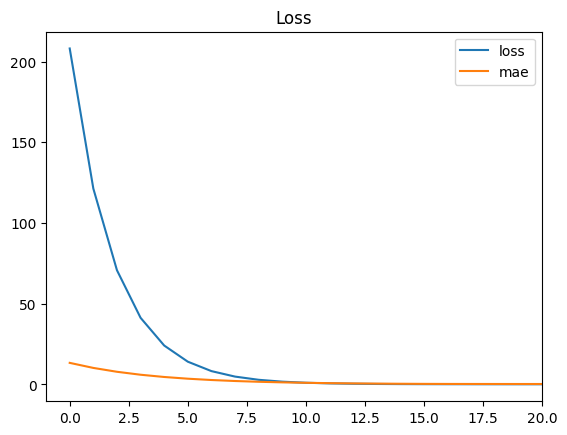

In [19]:
# history 변수 사용해서 epoch별 훈련 손실 및 평가지표 시각화
import matplotlib.pyplot as plt

# 20 epoch까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['mae'],label='mae')
plt.xlim(-1,20)
plt.title('Loss')
plt.legend()
plt.show()

> 10 부터 느려짐

## 2-9 검증

In [20]:
# 검증
model.evaluate(x,y)

1/1 [==============================] - 1s 561ms/step - loss: 4.1678e-05 - mae: 0.0055


[4.1678107663756236e-05, 0.0055412291549146175]

## 2-10 예측

In [21]:
# 예측
model.predict([10])

1/1 [==============================] - 0s 171ms/step


array([[32.02678]], dtype=float32)

# 03 심층 신경망으로 이미지 분류
## 3-1 케라스 내장 데이터셋 로드
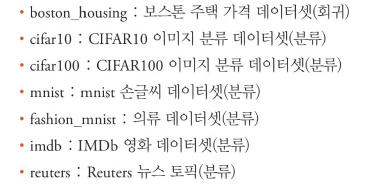


In [22]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

In [23]:
# load_data()로 데이터셋 로드
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [24]:
# 로드된 데이터셋 확인
print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


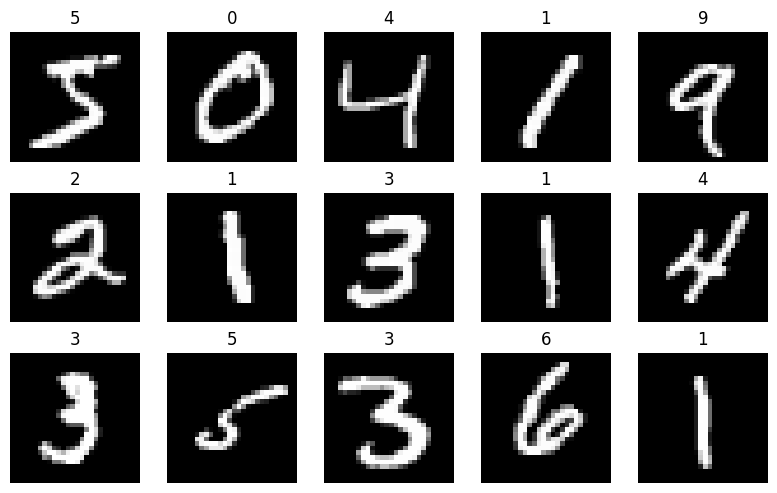

In [25]:
## 데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(8,5)

for i in range(15):
  ax = axes[i//5, i%5]
  # imshow로 이미지 시각화
  ax.imshow(x_train[i], cmap='gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

## 3-2 데이터 전처리

In [26]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [27]:
# 픽셀 값의 최소/최대값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

# 데이터 정규화
x_train = x_train / x_train.max()

# 정규화 후 최소/최대값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [28]:
# test 셋에도 정규화 동일 적용
x_test = x_test / x_test.max()

In [29]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

## 3-3 Flatten 레이어

In [30]:
# 이미지 데이터를 1차원으로 전처리하여 주입
print(f'변경 전 shape:{x_train.shape}')
print(f'ID으로 shape 변경 후: {x_train.reshape(60000,-1).shape}')

변경 전 shape:(60000, 28, 28)
ID으로 shape 변경 후: (60000, 784)


In [31]:
# 다차원 데이터를 1차원으로 펼쳐주는 방법
print(f'변경 전 shape:{x_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후:{tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape:(60000, 28, 28)
Flatten 적용 후:(60000, 784)


## 3-4 활성화 함수
* 입력을 비선형 출력으로 변환해주는 함수
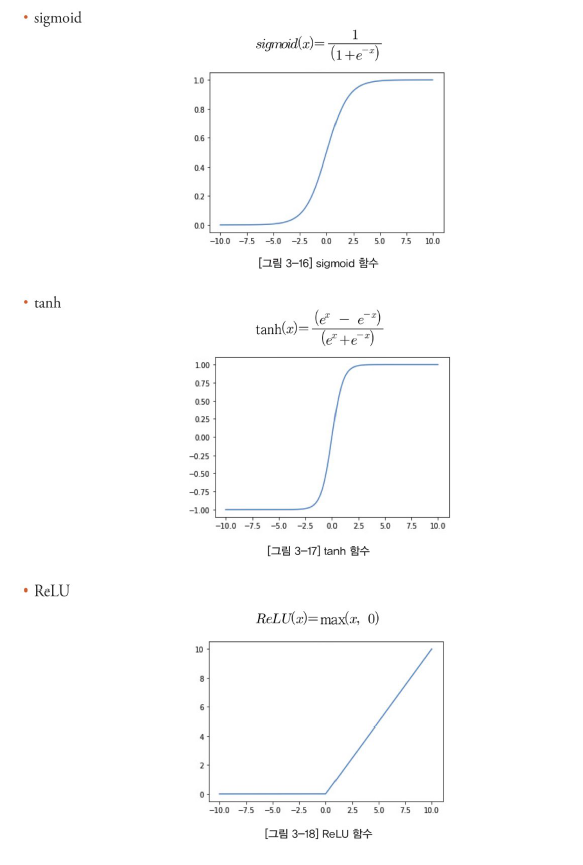
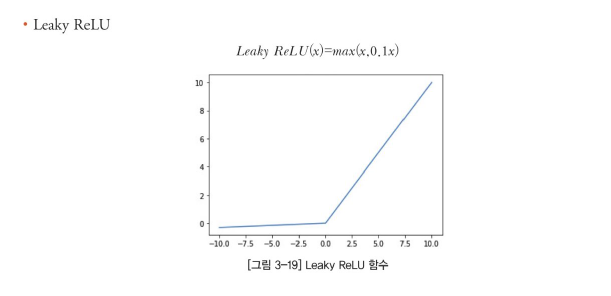

In [32]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

In [33]:
# Dense 레이어와 relu 활성호 함수 레이어를 별도 적용한 경우
model = tf.keras.Sequential([
        tf.keras.layers.Dense(128),
        tf.keras.layers.Activation('relu')
])

> 배치 정규화 적용하고 활성화 함수 적용할 때 많이 사용, 즉 레이어 구성 커스터마이징하고 싶을 때 구분하여 처리

## 3-5 입력과 출력
* 분류 모델의 마지막 레이어: 출력층
  * 출력층 노드 개수 = 분류할 클래스 개수

In [34]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        # 노드 = 10개(클래스 개수와 동일) = 마지막 출력층의 노드 개수
        tf.keras.layers.Dense(10, activation='softmax'),
])

출력층의 노드 개수 =1(이진 분류)
* sigmoid

출력층의 노드 개수 >= 2 (다중 분류 문제)
* softmax 적용


In [35]:
# 출력층 노드 = 1인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

# 출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation='softmax')

## 3-6 손실 함수
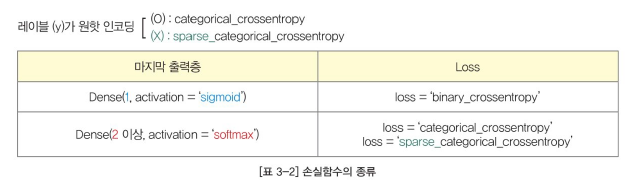

In [36]:
# 이진 분류(출력 노드 개수 = 1, sigmoid인 경우)
model.compile(loss='binary_crossentropy')

In [37]:
# y가 원핫 벡터인 경우
# [0.,0.,0.,0.,0.,1.,0.,0.,0.,0.]
model.compile(loss='categorical_crossentropy')
# y가 원핫 벡터가 아닌 경우
model.compile(loss='sparse_categorical_crossentropy')

## 3-7 옵티마이저
* 손실 낮추려고 신경망 가중치와 학습률 같은 신경망 속성을 변경하는 데 사용되는 최적화 방법
* Adam 자주 사용
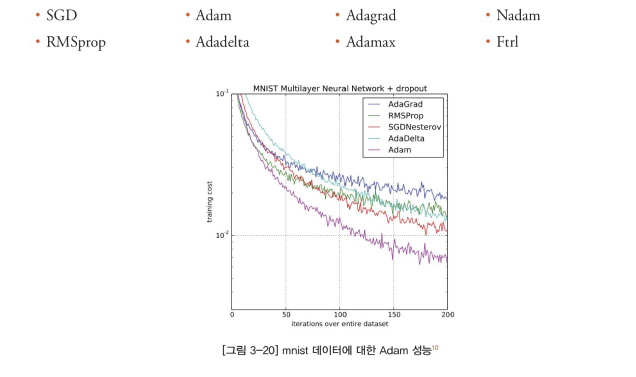

In [38]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer='adam')

## 3-8 평가지표

In [39]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

In [40]:
# 문자열로 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 3-9 훈련


In [41]:
# 훈련
model.fit(x_train, y_train,
          # 검증 셋 지정
          validation_data=(x_test, y_test),
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2309 - accuracy: 0.9307 - val_loss: 0.1338 - val_accuracy: 0.9583
Epoch 2/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0945 - accuracy: 0.9711 - val_loss: 0.0995 - val_accuracy: 0.9703
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0670 - accuracy: 0.9793 - val_loss: 0.0885 - val_accuracy: 0.9733
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0511 - accuracy: 0.9836 - val_loss: 0.0826 - val_accuracy: 0.9754
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0400 - accuracy: 0.9876 - val_loss: 0.0772 - val_accuracy: 0.9772
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0337 - accuracy: 0.9893 - val_loss: 0.0815 - val_accuracy: 0.9772
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0285 - accuracy: 0.9905 - val_loss: 0.0882 - val_

## 3-10 평가

In [42]:
# 검증
test_loss, test_acc = model.evaluate(x_test, y_test)

print('검증 셋 정확도:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0992 - accuracy: 0.9784
검증 셋 정확도: 0.9783999919891357


## 3-11 예측

In [43]:
# 예측
predictions = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [44]:
# 예측 결과 출력
predictions[0]

array([5.6922064e-14, 4.4766617e-09, 3.1348400e-11, 1.9298176e-10,
       9.1455532e-12, 2.2060730e-11, 3.6227869e-21, 9.9999994e-01,
       3.7750768e-11, 8.4200868e-09], dtype=float32)

넘파이 배열의 argmax 활용해 가장 높은 확률값 가지는 클래스 결과 확인

In [45]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


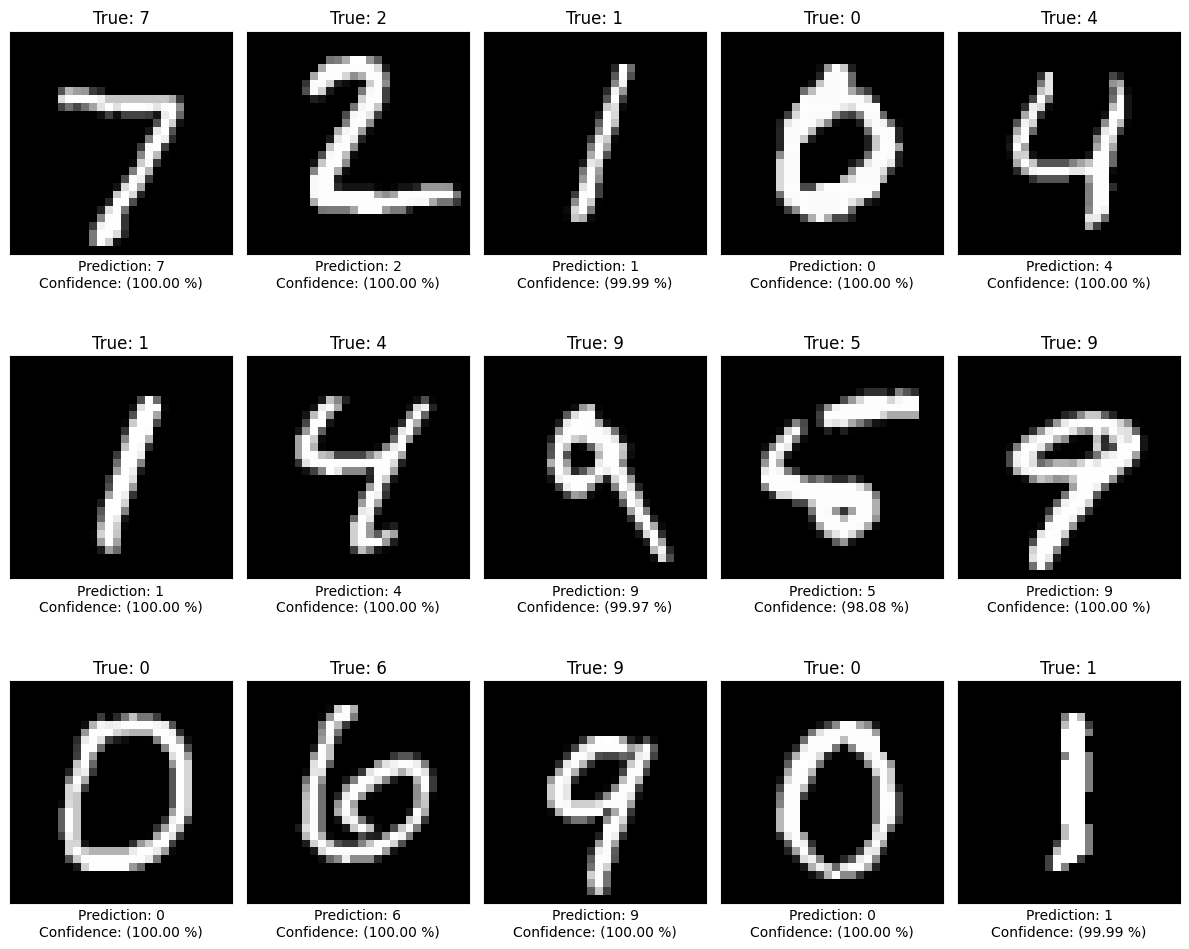

In [46]:
## 데이터 시각화
import matplotlib.pyplot as plt
def get_one_result(idx):
  img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
  return img, y_true, y_pred, confidence

# canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(12,10)
for i in range(15):
  ax = axes[i//5, i%5]
  img, y_true, y_pred, confidence = get_one_result(i)
  # imshow로 이미지 시각화
  ax.imshow(img, cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True: {y_true}')
  ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')
plt.tight_layout()
plt.show()